# Seasonal Arima (SARIMA)

## Importing Necessary Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import auto_arima
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Importing and Processing Data

In [2]:
df = pd.read_csv('m4_2xlarge_ap_southeast_2a_linux_unix.csv')

In [3]:
df

,Time,Price
0,2021-03-27,0.1425
1,2021-03-28,0.1445
2,2021-03-29,0.1456
3,2021-03-30,0.1519
4,2021-03-31,0.1526
...,...,...
85,2021-06-20,0.1683
86,2021-06-21,0.1688
87,2021-06-22,0.1693
88,2021-06-23,0.1689


In [4]:
df.describe()

,Price
count,90.000000
mean,0.155623
std,0.007094
min,0.142500
25%,0.151200
50%,0.154000
75%,0.162325
max,0.169300


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    90 non-null     object 
 1   Price   90 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [6]:
df['Time'] = pd.to_datetime(df.Time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    90 non-null     datetime64[ns]
 1   Price   90 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


In [7]:
df.head()

,Time,Price
0,2021-03-27,0.1425
1,2021-03-28,0.1445
2,2021-03-29,0.1456
3,2021-03-30,0.1519
4,2021-03-31,0.1526


In [8]:
df.set_index('Time', inplace=True)

In [9]:
df.head()

,Price
Time,
2021-03-27,0.1425
2021-03-28,0.1445
2021-03-29,0.1456
2021-03-30,0.1519
2021-03-31,0.1526


## Visualising Data

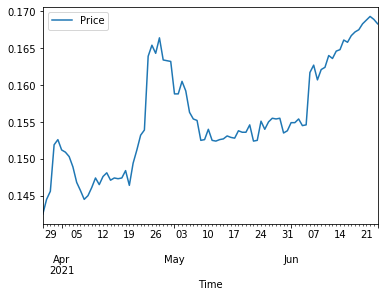

In [10]:
df.plot()
plt.show()

## Checking Stationarity

In [11]:
from pmdarima.arima import ADFTest

In [12]:
adf_test = ADFTest(alpha=0.05)
print(adf_test)
adf_test.should_diff(df)

ADFTest(alpha=0.05, k=None)


(0.3450806831424805, True)

## Train and Test Split

In [13]:
n = int(len(df) * 0.8)

In [14]:
train = df.Price[:n]
test = df.Price[n:]
print(f"For Training\n{train}\n")
print(f"For Testing\n{test}")

For Training
Time
2021-03-27    0.1425
2021-03-28    0.1445
2021-03-29    0.1456
2021-03-30    0.1519
2021-03-31    0.1526
               ...  
2021-06-02    0.1549
2021-06-03    0.1554
2021-06-04    0.1545
2021-06-05    0.1546
2021-06-06    0.1617
Name: Price, Length: 72, dtype: float64

For Testing
Time
2021-06-07    0.1627
2021-06-08    0.1607
2021-06-09    0.1621
2021-06-10    0.1624
2021-06-11    0.1640
2021-06-12    0.1636
2021-06-13    0.1646
2021-06-14    0.1648
2021-06-15    0.1661
2021-06-16    0.1658
2021-06-17    0.1667
2021-06-18    0.1672
2021-06-19    0.1675
2021-06-20    0.1683
2021-06-21    0.1688
2021-06-22    0.1693
2021-06-23    0.1689
2021-06-24    0.1683
Name: Price, dtype: float64


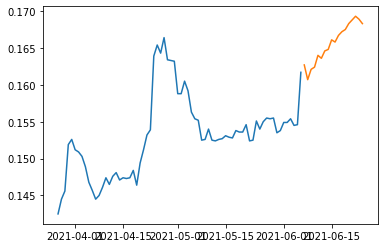

In [15]:
plt.plot(train)
plt.plot(test)
plt.show()

## Arima Model

In [16]:
arima_model=auto_arima (train, start_p=0, d=1, start_q=0, max_p=5,
                        max_d=5, max_q=5, start_P=0, D=1, start_Q=0,
                        max_P=5, max_D=5, max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace = True, 
                        supress_warnings=True, stepwise = True, 
                        random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-516.975, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-530.120, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-513.239, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-516.065, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-527.088, Time=0.57 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-514.146, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-530.522, Time=0.35 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=-525.992, Time=1.05 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=-525.240, Time=2.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-531.893, Time=0.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-530.287, Time=0.42 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-512.976, Time=0.30 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-532.968, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-530.085, Time=0.28 sec
 ARIMA(0,1,0)(2,1,1

In [17]:
# Best model:  ARIMA(2,1,1)(0,1,2)[12]          
# Total fit time: 52.531 seconds

In [18]:
# Best model:  ARIMA(3,1,0)(0,0,0)[0]          
# Total fit time: 2.820 seconds

In [19]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 268.484
Date:                            Wed, 22 Sep 2021   AIC                           -532.968
Time:                                    00:54:20   BIC                           -528.812
Sample:                                         0   HQIC                          -531.346
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5770      0.076     -7.571      0.000      -0.726      -0.428
sigma2      6.028e-06   7.03e-07      8.579      0.000    4.65e-06    7.41e-06
===================================================================================
Ljung-Box (Q):                       30.49   Jarque-Bera (JB):                30.54
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.75
Prob(H) (two-sided):                  0.41   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting

In [20]:
prediction = pd.DataFrame(arima_model.predict(n_periods=18), 
                          index=test.index)
prediction_columns = ['predicted_price']
prediction

,0
Time,
2021-06-07,0.162181
2021-06-08,0.162623
2021-06-09,0.162465
2021-06-10,0.162450
2021-06-11,0.162181
2021-06-12,0.162192
2021-06-13,0.162658
2021-06-14,0.163235
2021-06-15,0.162177


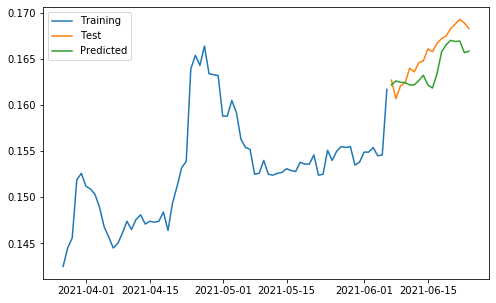

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(train, label="Training")
plt.plot(test, label='Test')
plt.plot(prediction, label="Predicted")
plt.legend(loc="upper left")
plt.show()

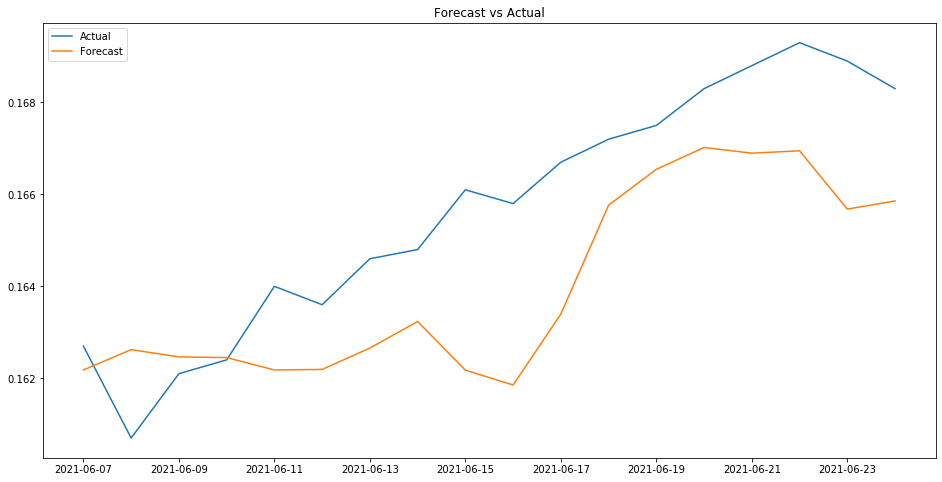

In [32]:
step = 18

# fc = pd.Series(fc, index=test[:step].index)
# print(fc)
plt.figure(figsize=(16, 8))

plt.plot(test[:step], label="Actual")

plt.plot(prediction, label="Forecast")

plt.title("Forecast vs Actual")
plt.legend(loc="upper left")
plt.show()

## R2 Score

In [22]:
test_df = pd.DataFrame(test)
test_df
# test['predicted_prices'] = prediction

,Price
Time,
2021-06-07,0.1627
2021-06-08,0.1607
2021-06-09,0.1621
2021-06-10,0.1624
2021-06-11,0.1640
2021-06-12,0.1636
2021-06-13,0.1646
2021-06-14,0.1648
2021-06-15,0.1661


In [23]:
test_df['predicted_prices'] = prediction
test_df = test_df.dropna()
test_df

,Price,predicted_prices
Time,,
2021-06-07,0.1627,0.162181
2021-06-08,0.1607,0.162623
2021-06-09,0.1621,0.162465
2021-06-10,0.1624,0.162450
2021-06-11,0.1640,0.162181
2021-06-12,0.1636,0.162192
2021-06-13,0.1646,0.162658
2021-06-14,0.1648,0.163235
2021-06-15,0.1661,0.162177


In [24]:
r2_score(test_df['Price'], test_df['predicted_prices'])

0.2708253331323097

In [27]:
np.sqrt(mean_squared_error(test_df['Price'], test_df['predicted_prices']))

0.0022059477902611415